## Final Project Submission

Please fill out:
* Student name: 
                Jane Mwangi, 
                Yvonne Kamari,
                Wilfred Kivinda,
                Eric Njeru
* Student pace:  Part time 
* Scheduled project review date/time: 11th September 2023
* Instructor name: MaryAnn Mwikali
* Blog post URL:


# KING COUNTY HOUSE PRICING PROJECT.

## Project Overview

This project focuses on providing data-driven insights to real estate firms operating in King County. Leveraging a comprehensive dataset containing various housing-related features and house prices, the goal is to gain a deep understanding of the factors influencing house prices in the county. This information will enable real estate professionals to make informed decisions, enhance their property valuation processes, and optimize their market strategies.

## Business Problem

The King County housing market exhibits various patterns and factors influencing house prices. However, there is a need to understand these factors more comprehensively to aid real estate stakeholders in making informed decisions. The primary business problem is to develop a robust pricing model that accurately predicts house prices based on various features. This model should provide insights into which features have the most significant impact on house prices and help real estate professionals, sellers, and buyers make informed decisions.

## Project Objectives:

The project aim is to construct a predictive model for house prices in King County, Washington, utilizing comprehensive data encompassing bedrooms, bathrooms, square footage, condition, location, and relevant attributes. This endeavor serves a dual purpose: understanding the primary determinants of house prices and enhancing pricing accuracy for real estate transactions.

## Methodology:

The project follows a structured methodology to achieve its objectives:

Data Preprocessing: Loading and cleaning the dataset, tackling issues such as missing values, outliers, and categorical variables. Ensuring data quality is essential for reliable analysis.

Exploratory Data Analysis (EDA): Comprehensive EDA is conducted to gain insights into the data's distribution, correlations, and patterns. Visualizations and statistical analyses are employed to uncover significant trends.

Feature Selection: Through correlation analysis, VIF assessment for multicollinearity detection, and domain knowledge, significant features are identified. This step is crucial in determining which aspects of a property have the most substantial impact on house prices.

Model Building: Multiple regression models, including linear, multiple linear, and advanced techniques, are constructed to predict house prices. These models leverage the identified features to provide accurate estimates.

Model Evaluation: Model performance is assessed using metrics such as R-squared, p-values, and feature coefficients. Continuous evaluation ensures the model's reliability.

Model Optimization: Fine-tuning the model is essential to enhance predictive accuracy and interpretability, making it a valuable tool for decision-making.

## Key Challenges:

Pricing Accuracy: Real estate professionals struggle to determine competitive and fair property prices due to a lack of quantitative insights into the factors that drive house prices in King County.

Client Satisfaction: Inadequate pricing guidance can lead to dissatisfied clients, as properties may be priced too high, leading to longer time on the market, or too low, resulting in missed revenue opportunities.

Competitive Advantage: Without data-driven insights, real estate firms are at a disadvantage compared to competitors who can provide clients with precise pricing recommendations.


## Install & Import the Required Libraries


In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

## Loading  the Data Into a Data Frame


In [3]:
df = pd.read_csv("data/kc_house_data.csv")

### Column Descriptions

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## Data Cleaning and Preparation

This process involves refining data to ensure its suitability for analysis. This entails the elimination of irrelevant or inaccurate information that could potentially impede the effectiveness of our models . Key tasks within data preparation involve the identification and resolution of missing values, rectification of erroneous data entries, and the reduction of duplicate records.

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [6]:
# Find the shape of our dataset
df.shape

print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 21597
Number of Columns: 21


In [7]:
# Display summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Our data has 6 variables as objects i.e Date, waterfront,view, condition, grade,sqft_basement

### Dealing with the Missing Values

In [8]:
# Find the percentage of missing values in each column
percantage_msng_values = df.isnull().sum()* 100 / len (df)

print(percantage_msng_values.round(2))

id                0.00
date              0.00
price             0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64


Our data frame has some missing values in waterfront, view and year renovated columns constituting to 11%, 0.29% and 17.79% respectively.

In [9]:
# Finding unique values in the "waterfront" column
unique_values_wf = df['waterfront'].unique()

print(unique_values_wf)


[nan 'NO' 'YES']


In [10]:
# Find the total number of houses where 'waterfront' is 'yes'
total_waterfront_yes = len(df[df['waterfront'] == 'YES'])

# Print the total number
print("Total number of houses where 'waterfront' is 'YES':", total_waterfront_yes)

Total number of houses where 'waterfront' is 'YES': 146


In [11]:
# Replace null values in 'waterfront' with 'NO'
df['waterfront'].fillna('NO', inplace=True)

The waterfront columns contain nan, No and Yes unique values. We decided to fill nan entries with No on assumption that these houses lacked a waterfront and hence entries made as nan

In [12]:
# Find unique values in the view column
unique_values_view = df['view'].unique()

print(unique_values_view)

['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [13]:
# Find out how many houses have null values under the 'view' column
null_values_view = df['view'].isnull().sum()

# Print the total number
print("Total number of houses with null values under the 'view' column:", null_values_view)

Total number of houses with null values under the 'view' column: 63


In [14]:
#find out how many
total_view_none = len(df[df['view'] == 'NONE'])

# Print the total number
print("Total number of houses where 'view' is 'NONE':", total_view_none)

Total number of houses where 'view' is 'NONE': 19422


In [15]:
# Replace NaN values in the 'view' column with 'NONE'
df['view'].fillna('NONE', inplace=True)

The view columns contain 'NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR' unique values. The nan entries are 63 in number. We decided to fill the nan entries  with 'NONE' after we assumed that these houses lacked a quality view

In [16]:
# Finding unique values in the the yr_renovated column
unique_values_renovation = df['yr_renovated'].unique()
unique_values_renovation.sort()

print(unique_values_renovation)

[   0. 1934. 1940. 1944. 1945. 1946. 1948. 1950. 1951. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1962. 1963. 1964. 1965. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


In [17]:
# Find the number of houses with 'yr_renovated' greater than 0
houses_with_renovations = df[df['yr_renovated'] > 0]

# Print the number of houses with 'yr_renovated' greater than 0
print("\nNumber of houses with 'yr_renovated' greater than 0:", len(houses_with_renovations))


Number of houses with 'yr_renovated' greater than 0: 744


In [18]:
# Replace null values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)

The yr_renovated column has year values ranging between 1934 and 2015, however it also contains 0 and nan entries. We made an assumption that these were houses that had never been renovated. We then replaced the nan entries with 0

In [19]:
# Investigating the condition column
unique_values_condition = df['condition'].unique()

print(unique_values_condition)

['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [20]:
# Investigating the grade column
unique_values_grade = df['grade'].unique()

# Sorting the unique values in ascending order
unique_values_grade.sort()

print(unique_values_grade)

['10 Very Good' '11 Excellent' '12 Luxury' '13 Mansion' '3 Poor' '4 Low'
 '5 Fair' '6 Low Average' '7 Average' '8 Good' '9 Better']


In [21]:
missing_values_percent = df.isnull().sum() * 100 / len(df)

print(missing_values_percent)

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64


We have cleaned our data and no longer have missing values.

In [22]:
# Investigate the 'sqft_basement' column
df['sqft_basement'].head(8)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
Name: sqft_basement, dtype: object

In [23]:
# Count number of '?' in 'sqft_basement' column
count_question_marks = df['sqft_basement'].str.count('\?').sum()

# Calculate the percentage of '?' in 'sqft_basement' column
percentage_question_marks = (count_question_marks / len(df['sqft_basement'])) * 100

print("Number of '?' in 'sqft_basement' column:", count_question_marks)
print("Percentage of '?' in 'sqft_basement' column:", percentage_question_marks.round(2))

Number of '?' in 'sqft_basement' column: 454
Percentage of '?' in 'sqft_basement' column: 2.1


In [24]:
# Drop rows with '?' in the 'sqft_basement' column
df = df[df['sqft_basement'] != '?']

# Convert the 'sqft_basement' column to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [25]:
# To remove duplicates in 'df' in place
df.drop_duplicates(inplace=True)



### Data Conversion
Conversion of expected features to the right data types

In [26]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [27]:
# Convert the 'year_renovated' column to integers
df['yr_renovated'] = df['yr_renovated'].astype(int)

### Detect Outliers
We check for outliers that may interfere with measures of tendency in our dataset, data quality, statistical accuracy, model performance and visualization.

In [28]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,1789.069006,291.851724,1971.023223,68.256492,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,2.876328e+09,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,828.409769,442.498337,29.321938,362.765827,53.535756,0.138591,0.140597,685.67034,27169.273663
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


We deduce the following information from the data’s summary statistics:
* Average house price: USD540,510.7, with a standard deviation of USD368,075.1. Prices range from USD78,000 to USD7,700,000.
* Average number of bedrooms: 3.37, with a standard deviation of 0.92. Bedrooms range from 1 to 33, potentially indicating data errors.
* Average number of bathrooms: 2.12, with a standard deviation of 0.77. Bathrooms range from 0.5 to 8.
* Average living space: Approximately 2080.92 sq. ft., with a standard deviation of 918.55 sq. ft. Living space varies from 370 sq. ft. to 13,540 sq. ft.
* Average lot size: Around 15,087.14 sq. ft., with a standard deviation of 41,209.2 sq. ft. Lot sizes range from 520 sq. ft. to 1,651,359 sq. ft.
* Average number of floors: Approximately 1.49, with a standard deviation of 0.54. Properties have 1 to 3.5 floors.
* Average year built: Around 1971, with a standard deviation of 29.32. Buildings date from 1900 to 2015.
* Average renovation year: Approximately 68.26, with variations. Properties range from no renovations to those renovated as recently as 2015.
* Average zipcode: 98077, with moderate variability (standard deviation 53.54). Zipcodes range from 98001 to 98199.
* Average latitude: Approximately 47.56, with minimal variability (standard deviation 0.14). Latitudes range from 47.16 to 47.78.
* Average longitude: Roughly -122.21, with minimal variability (standard deviation 0.14). Longitudes range from -122.52 to -121.31.
* Average sq. ft. of interior living space for nearest 15 neighbors: Around 1987.27 sq. ft., with a standard deviation of 685.67 sq. ft. Sizes vary from 399 sq. ft. to 6,210 sq. ft.
* Average sq. ft. of land lots for nearest 15 neighbors: Approximately 12,738.94 sq. ft., with significant variability (standard deviation 27,169.27 sq. ft.). Lot sizes range from 651 sq. ft. to 871,200 sq. ft.


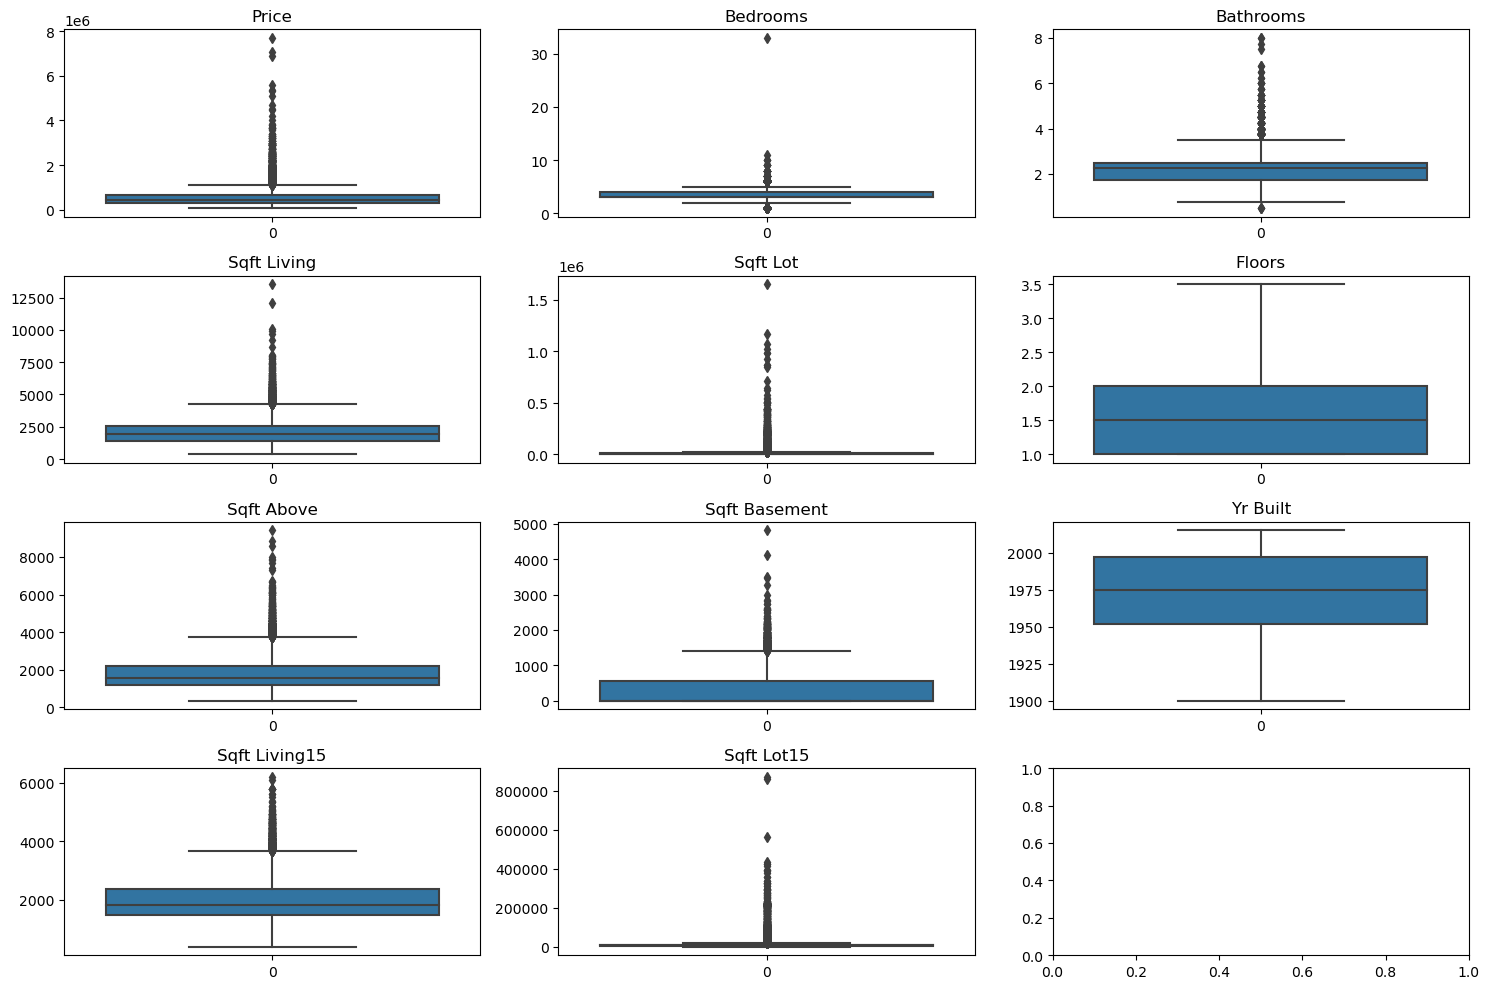

In [29]:
# Check for outliers in the numeric variables
def detectoutliers():
    fig, axs = plt.subplots(4, 3, figsize=(15, 10))
    
    sns.boxplot(df['price'], ax=axs[0, 0])
    axs[0, 0].set_title('Price')
    sns.boxplot(df['bedrooms'], ax=axs[0, 1])
    axs[0, 1].set_title('Bedrooms')
    sns.boxplot(df['bathrooms'], ax=axs[0, 2])
    axs[0, 2].set_title('Bathrooms')
    sns.boxplot(df['sqft_living'], ax=axs[1, 0])
    axs[1, 0].set_title('Sqft Living')
    sns.boxplot(df['sqft_lot'], ax=axs[1, 1])
    axs[1, 1].set_title('Sqft Lot')
    sns.boxplot(df['floors'], ax=axs[1, 2])
    axs[1, 2].set_title('Floors')
    sns.boxplot(df['sqft_above'], ax=axs[2, 0])
    axs[2, 0].set_title('Sqft Above')
    sns.boxplot(df['sqft_basement'], ax=axs[2, 1])
    axs[2, 1].set_title('Sqft Basement')
    sns.boxplot(df['yr_built'], ax=axs[2, 2])
    axs[2, 2].set_title('Yr Built')
    sns.boxplot(df['sqft_living15'], ax=axs[3, 0])
    axs[3, 0].set_title('Sqft Living15')
    sns.boxplot(df['sqft_lot15'], ax=axs[3, 1])
    axs[3, 1].set_title('Sqft Lot15')
    
    plt.tight_layout()
    plt.show()

detectoutliers()

In [30]:
# Find houses with more than 6 bedrooms
houses_above_6_bedrooms = len(df[df['bedrooms'] >6])
houses_above_6_bedrooms

60

In [31]:
# Drop the houses with more than 6 bedrooms (outliers)
df = df[df['bedrooms'] <= 6]

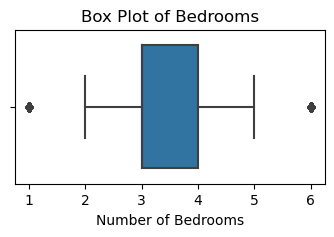

In [32]:
# Plot the 'bedrooms' column
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['bedrooms'])
plt.title('Box Plot of Bedrooms')
plt.xlabel('Number of Bedrooms')

plt.show()

We found out that certain houses had an exceptionally high number of bedrooms, such as one with 33 bedrooms. We considered this to be impractical especially with a relatively low area in square feet. As a result, we chose to focus our efforts on houses that had a maximum of 6 bedrooms for the sake of practicality.